In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
class QDA:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.cov = {}
        self.priors = {}
        
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.cov[c] = np.cov(X_c, rowvar=False)
            self.priors[c] = X_c.shape[0] / X.shape[0]
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        posteriors = []
        
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = self._likelihood(c, x)
            posterior = prior + likelihood
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]
    
    def _likelihood(self, c, x):
        mean = self.mean[c]
        cov = self.cov[c]
        inv_cov = np.linalg.inv(cov)
        term1 = -0.5 * np.log(np.linalg.det(cov))
        term2 = -0.5 * np.dot((x - mean).T, np.dot(inv_cov, (x - mean)))
        return term1 + term2

In [11]:
qda = QDA()
qda.fit(X_train, y_train)

In [13]:
y_pred = qda.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


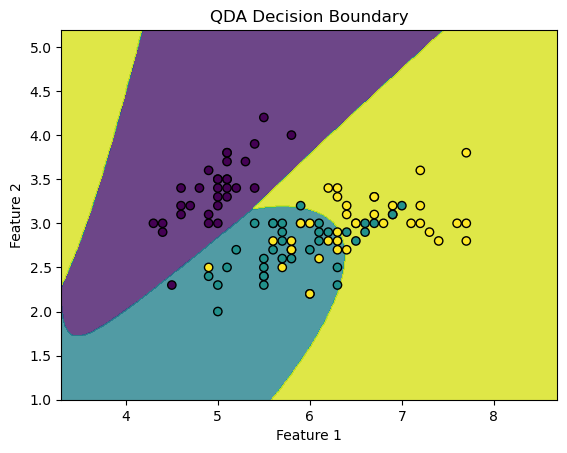

In [17]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('QDA Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary
X_train_2d = X_train[:, :2]  # Using only the first two features for visualization
qda.fit(X_train_2d, y_train)
plot_decision_boundary(X_train_2d, y_train, qda)